In [25]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time
import os
import urllib.request


In [27]:
DRIVER_PATH = 'chromedriver.exe'
driver = webdriver.Chrome(executable_path=DRIVER_PATH)
plant = 'cabbages'
driver.get('https://www.google.com/search?q=' + plant +'&sxsrf=ALiCzsaji2Ezf_rA_JnE3VktpaOIKntPwQ:1669746319888&source=lnms&tbm=isch&sa=X&ved=2ahUKEwic74vigdT7AhU-BjQIHVMDA_wQ_AUoAXoECAIQAw&biw=458&bih=992&dpr=1.25')

height_before = driver.execute_script("return document.body.scrollHeight")

for i in range(15):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")
    height_after = driver.execute_script("return document.body.scrollHeight")
    time.sleep(3)
    if (height_after == height_before):
        try:
            element = driver.find_elements(By.CLASS_NAME, "mye4qd")[0].click()
            element[0].click()
        except:
            pass
    
    height_before = height_after
# print(driver.page_source)


soup = BeautifulSoup(driver.page_source)
pictures = soup.find_all("div", {"class": "isv-r PNCib MSM1fd BUooTd"})

C:\Users\abeme\AppData\Local\Temp\ipykernel_20252\1119680646.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=DRIVER_PATH)






















https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTknhH9RGngJcLXD5Bbe1tsSbf6WYY3GwZR4Q&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRLUCanrfzDsffljJ3sB3gOa4Td5VGygLPjWA&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQxKuIEGYSFWhlu5bfb-_NDQgkIbFFwocAhfw&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQt1IS275utk3CFM8NtRp8UXR3_g-ZteaqIAA&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQEZsRASlA8oMMOTjqoWnudSkIBZgiLvVOaxg&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQj2uZOu_5URP3-hM9vSApSNi6wuVhrCK9gQQ&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSAsyhy42UKJsuE-dTNGZCjQ7rN3M4nmxR5Pg&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRFLubAqbAsSu5P-Iow9eDbwAfQ5qzXVYiaLQ&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRJc7ojhtVuJMr0h47wofKdJ2YuqixXVX4cbA&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRcFvuMtJIr0ZqZ9mUCirO0h5vK
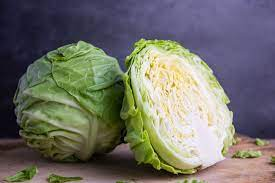
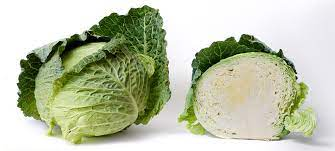
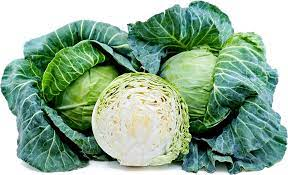
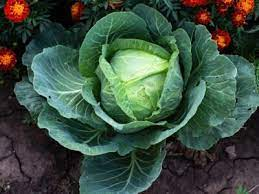
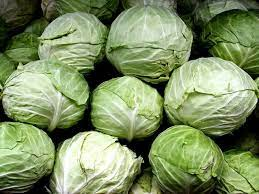
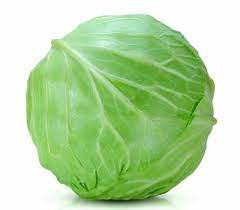
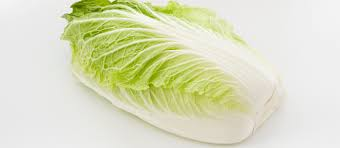
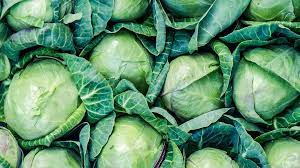
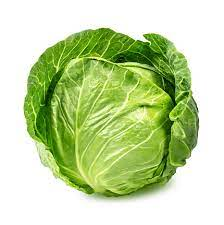
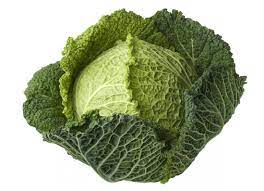
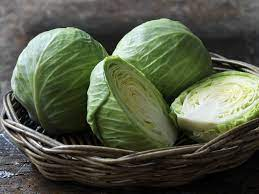
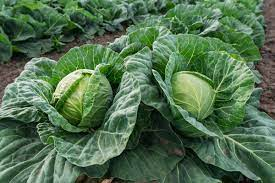
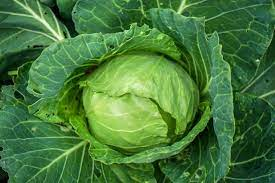
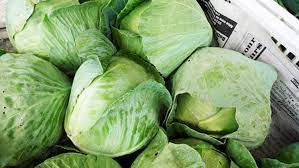
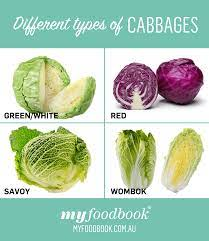
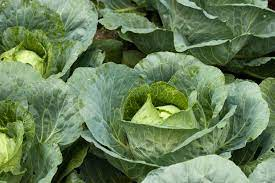
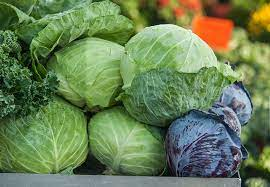
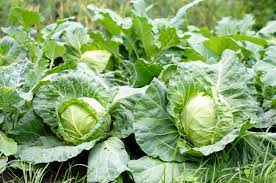
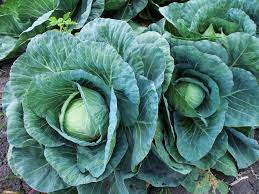
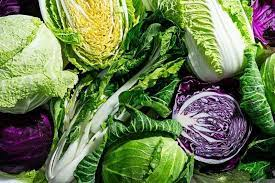

714

In [29]:
urls = []
for each in pictures:
    img = each.find("img")
    if img.has_attr('src'):
        print(img['src'])
        urls.append(img['src'])

len(urls)

In [23]:
import pathlib

try:
    os.makedirs("cabbages")
except FileExistsError:
    pass

i = 1
for link in urls:

    file_name = plant + str(i) + ".jpeg"
    
    urllib.request.urlretrieve(link, file_name)
    time.sleep(5)
    i += 1

NameError: name '__file__' is not defined

'/cabbages/Hello'